In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [3]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
## structure of the dataset 
house_price_df = pd.DataFrame(data = house_price_dataset.data, columns=house_price_dataset.feature_names)

house_price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
house_price_df['price'] = house_price_dataset.target
house_price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
house_price_df.shape

(20640, 9)

In [7]:
## checking for missing values
house_price_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [8]:
house_price_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

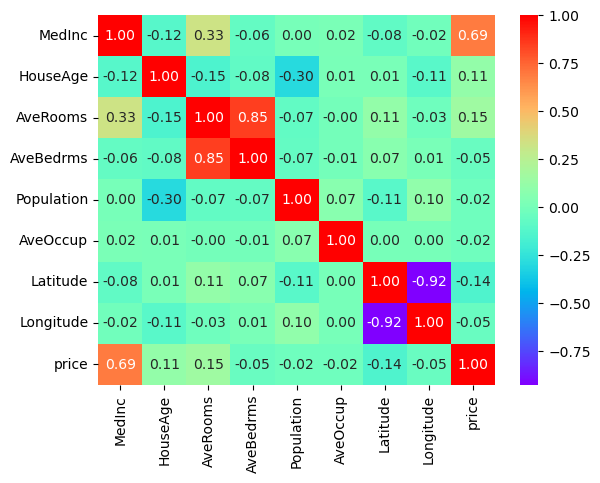

In [9]:
corelation_matrix = house_price_df.corr()

## fmt define the number of decimal places to display
sns.heatmap(corelation_matrix, fmt='.2f', annot=True, cmap='rainbow')

In [10]:
X = house_price_df.drop('price', axis=1)
Y = house_price_df['price']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

## Model Training

### XGBoost Regressor

In [12]:
model = XGBRegressor()

In [13]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [14]:
prediction_data = model.predict(X_train)
print(prediction_data)

# R squared error 
score_1 = metrics.r2_score(Y_train, prediction_data)
print("R squared error for training data: ", score_1)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, prediction_data)
print("Mean absolute error for training data: ", score_2)

[0.7008398 2.9301133 1.593501  ... 1.3646417 2.4235492 2.6715827]
R squared error for training data:  0.9472856199408466
Mean absolute error for training data:  0.18754175935381406


In [15]:
#This means 94.7% of the variance in the target (selling price, in your case) is explained by the model.

In [16]:
## test data prediction 

prediction_data_test = model.predict(X_test)
print(prediction_data_test)

# R squared error for test data
score_3 = metrics.r2_score(Y_test, prediction_data_test)    
print("R squared error for test data: ", score_3)

# mean absolute error for test data
score_4 = metrics.mean_absolute_error(Y_test, prediction_data_test)
print("Mean absolute error for test data: ", score_4)

[0.9358349 1.872146  3.7639368 ... 1.6286979 3.2940762 1.8962067]
R squared error for test data:  0.8386771412035462
Mean absolute error for test data:  0.31003115760120314


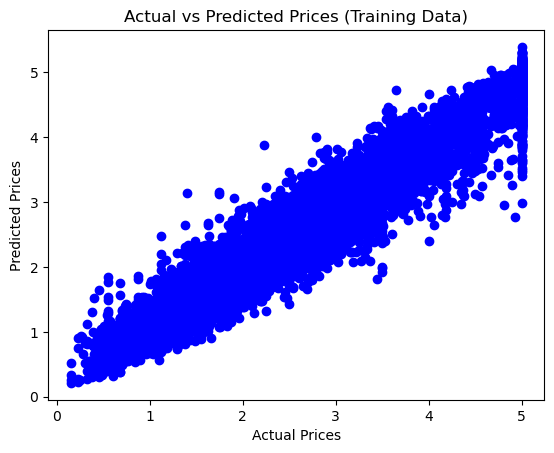

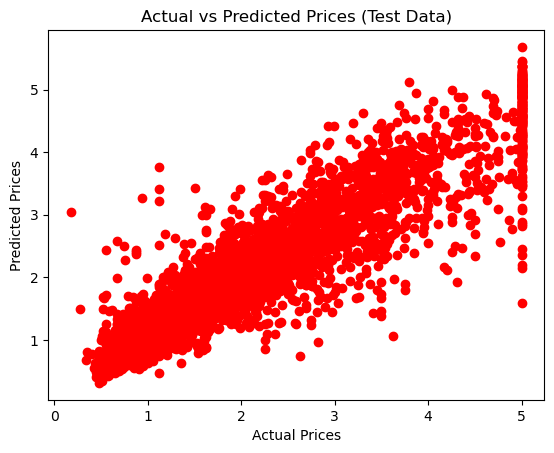

In [17]:
## plotting the predictions on the original and the predicted data
plt.scatter(Y_train, prediction_data, color='blue')
plt.title('Actual vs Predicted Prices (Training Data)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

plt.scatter(Y_test, prediction_data_test, color='red')
plt.title('Actual vs Predicted Prices (Test Data)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()